# Merra2 Direct Access

In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import ipywidgets as widgets
from pydap.client import open_url
from pydap.cas.urs import setup_session

## Earthdata Credentials
Enter your Earthdata username and password.

In [2]:
earthdata_username = widgets.Password(
    value='',
    placeholder='',
    description='Username:',
    disabled=False
)
earthdata_password = widgets.Password(
    value='',
    placeholder='',
    description='Password:',
    disabled=False
)

In [4]:
display(earthdata_username)
display(earthdata_password)

Password(description='Username:', placeholder='')

Password(description='Password:', placeholder='')

## Access Merra2 Data with Xarray

In [4]:
url = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/M2TMNXINT.\
5.12.4/1980/MERRA2_100.tavgM_2d_int_Nx.198001.nc4'
url

'https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONTHLY/M2TMNXINT.5.12.4/1980/MERRA2_100.tavgM_2d_int_Nx.198001.nc4'

In [5]:
!ls

LICENSE    environment.yml	merra2.ipynb
README.md  final-project.ipynb	subset_GPCPDAY_3.1_20221117_205948_.txt


In [10]:
afile = 'subset_GPCPDAY_3.1_20221117_205948_.txt'

In [11]:
with open(afile) as f:
    contents = f.readlines()

In [25]:
url=contents[2].strip()[:-65]
url

'https://measures.gesdisc.eosdis.nasa.gov/opendap/GPCP/GPCPDAY.3.1/2000/GPCPDAY_L3_20000601_V3.1.nc4'

In [26]:
session = setup_session(earthdata_username.value, earthdata_password.value, check_url=url)
pydap_ds = open_url(url, session=session)

store = xr.backends.PydapDataStore(pydap_ds)
ds = xr.open_dataset(store)

In [27]:
ds

<xarray.Dataset>
Dimensions:                    (time: 1, lat: 360, lon: 720, bnds: 2)
Coordinates:
  * bnds                       (bnds) float32 0.0 1.0
  * lat                        (lat) float32 89.75 89.25 88.75 ... -89.25 -89.75
  * lon                        (lon) float32 -179.8 -179.2 ... 179.2 179.8
  * time                       (time) datetime64[ns] 2000-06-01
Data variables:
    precip                     (time, lat, lon) float32 ...
    probability_liquid_precip  (time, lat, lon) float32 ...
    time_bnds                  (time, bnds) datetime64[ns] ...
Attributes: (12/67)
    ShortName:                      GPCPDAY
    LongName:                       GPCP Precipitation Level 3 Daily 0.5-Degr...
    VersionID:                      3.1
    GranuleID:                      GPCPDAY_L3_20000601_V3.1.nc4
    Format:                         NetCDF-4
    RangeBeginningDate:             2000-06-01
    ...                             ...
    Distribution_Format:            NetCDF-4
    IdentifierProductDOIAuthority:  http://dx.doi.org/
    Fees:                           None
    ProcessingLevel:                Level 3
    institution:                    Mesoscale Atmospheric Processes Laborator...
    comment:                        The GPCP V3.1 Daily is being developed in...

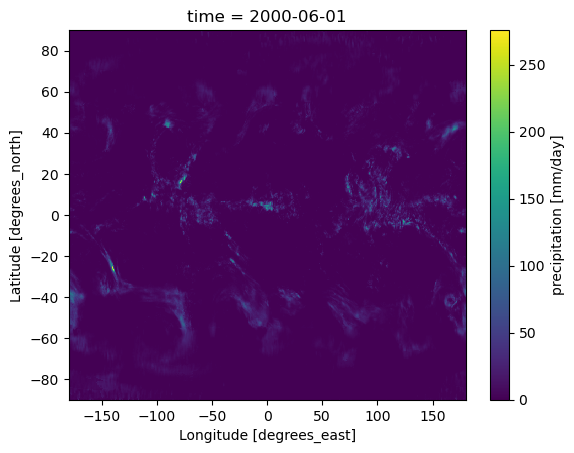

In [29]:
ds.precip.plot()